In [7]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
import tables as tb

def merge(a,b):
    final = np.zeros (len(a)+len(b))
    for i in range(len(a)):
        final[2*i]   = a[i]
        final[2*i+1] = b[i]
    return final

def read_keff_h5(file):
    db = tb.open_file(file, mode='r')
    sim_param = db.root.simulation_parameters
    init_param = db.root.initial_depcode_siminfo
    # Keff at t=0 depletion step
    k_0 = np.array([x['keff_bds'][0] for x in sim_param.iterrows()])
    k_0_e = np.array([x['keff_bds'][1] for x in sim_param.iterrows()])
    # Keff at t=end depletion step
    k_1 = np.array([x['keff_eds'][0] for x in sim_param.iterrows()])
    k_1_e = np.array([x['keff_eds'][1] for x in sim_param.iterrows()])
    depstep = [x['depletion_timestep'] for x in init_param.iterrows()][0]
    db.close()
    day = depstep*np.arange(len(k_0))
    return day, k_0, k_1, k_0_e, k_1_e, depstep

In [23]:
db_file = '/home/andrei2/Desktop/git/saltproc/develop/saltproc/data/db_saltproc.h5'
#db_file_7_5 = '/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/time_step_refinement/5leu_geo_swch/7_5d_840_steps.h5'
days, k_bds, k_eds, k_bds_err, k_eds_err, dep_step = read_keff_h5(db_file)
#days_7_5, k_bds_7_5, k_eds_7_5, k_bds_err_7_5, k_eds_err_7_5, dep_step_7_5 = read_keff_h5(db_file_7_5)

days2 = np.linspace(dep_step, (len(k_eds))*(dep_step), num=len(k_eds), endpoint=True)
#print(dep_step, days, days2)
#print(k_bds, k_eds)

<IPython.core.display.Javascript object>


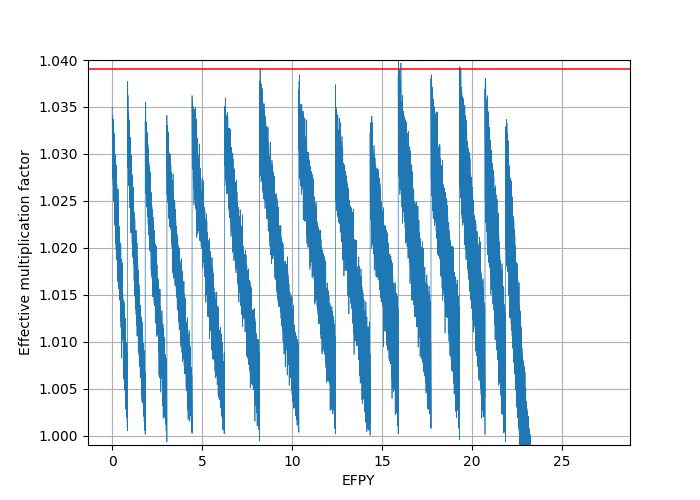

[ 1.01629996  1.00112998  1.01267004  0.999717    1.01258004  0.99871999
  1.01338005  0.99974     1.01279998  0.99937701  1.01100004  0.99866199
  1.01320004  0.99733001  1.01171994  0.99841499  1.01153004  0.998613
  1.00936997  0.99751198  1.00909996  0.995996    1.00864005  0.99642003
  1.00934994  0.99403101  1.00876999  0.99694002  1.00784004  0.99569303
  1.00810003  0.99650598  1.00616002  0.99470699  1.00704002  0.99346697
  1.00796998  0.99263299  1.00714004  0.99116498  1.00646996  0.99274701
  1.00737     0.99107301  1.00662005  0.990242    1.00671995  0.99312901
  1.00671995  0.990291    1.00476003  0.99028403  1.00435996  0.992275
  1.00506997  0.99063802  1.00309002  0.990336    1.00364995  0.98970002
  1.00335002  0.98979503  1.00291002  0.98871797  1.00287998  0.98832899
  1.00258005  0.98781699  1.00218999  0.98862201  1.00259995  0.98698997
  1.00193     0.98805302  1.00198996  0.98740298  1.00206995  0.98734403
  1.00033998  0.98565102]


In [32]:
#print(len(k_bds), len(k_bds_7_5[:641]))
keff = merge(k_bds, k_eds)
#keff_7_5 = merge(k_bds_7_5[:641], k_eds_7_5[:641])
efpd = merge(days, days2)
err = merge(k_bds_err, k_eds_err)

# Initialize figure
fig_keff_2 = matplotlib.pyplot.figure(2, figsize=[7,5])
ax = fig_keff_2.add_subplot(111)
ax.grid(True)
ax.plot(efpd/365.0, keff, '-', label='LEU 5% feed', linewidth=0.5, markerfacecolor="None")
#ax.plot(efpd/365.0, keff_7_5, '-', label='7.5d', linewidth=0.5, markerfacecolor="None")
#ax.plot(efpd_5, keff_5, '-', label='LEU 5%', linewidth=0.5, markerfacecolor="None", alpha=0.8)

#ax.fill_between(efpd, keff-err, keff+err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.axhline(y=1.039, linewidth=1.1, color='r', label='control rods total worth')
#ax.legend(loc=0)
ax.set_ylabel('Effective multiplication factor')
ax.set_xlabel('EFPY')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
#ax.set_xlim(0,max(days2))
#ax.set_ylim([0.75, 1.018])
# zoomed 2
#ax.set_ylim(0.915, 0.963)
# zoomed 1
#ax.set_ylim(0.98, 1.018)
#ax.set_xlim(0, 1500)
#ax.set_xlim(0,23)
ax.set_ylim(1.037, 1.044)
ax.set_ylim(0.999, 1.04)

#ax.set_xlim(20,23)
#ax.set_ylim(1.0, 1.075)


fig_keff_2.show()
#fig_keff_2.savefig('/home/andrei2/Desktop/keff_3.png',bbox_inches='tight', dpi=900)
#fig_keff_2.savefig('/home/andrei2/Desktop/git/meitner-task-2/doc/2019-06-q4-report/figures/keff_zoomed_1.png',bbox_inches='tight', dpi=700)
#print(keff[-700:-620])

In [33]:
indx = []
for i in range(len(keff)):
    if keff[i]-keff[i-1] > 0.025:
        indx.append(efpd[i])
        print(i, keff[i], efpd[i], (keff[i]-keff[i-1])*1e5)
print(indx)
print("Months between moderator rods re-configurations ", (np.diff(indx)/30))

0 1.03497004509 0.0 14162.003994
124 1.03492999077 310.0 3439.99862671
268 1.03351998329 670.0 3338.99259567
444 1.03409004211 1110.0 3475.6064415
648 1.03620994091 1620.0 3598.99997711
912 1.0350600481 2280.0 3488.00420761
1196 1.0377600193 2990.0 3833.50253105
1514 1.03682005405 3785.0 3647.00555801
1812 1.03736996651 4530.0 3719.99740601
2092 1.03225004673 5230.0 3220.99924088
2320 1.03846001625 5800.0 3828.00102234
2586 1.03803002834 6465.0 3728.00827026
2818 1.03710997105 7045.0 3754.79459763
3024 1.03691995144 7560.0 3679.99076843
3190 1.03243005276 7975.0 3306.00738525
[0.0, 310.0, 670.0, 1110.0, 1620.0, 2280.0, 2990.0, 3785.0, 4530.0, 5230.0, 5800.0, 6465.0, 7045.0, 7560.0, 7975.0]
Months between moderator rods re-configurations  [ 10.33333333  12.          14.66666667  17.          22.          23.66666667
  26.5         24.83333333  23.33333333  19.          22.16666667
  19.33333333  17.16666667  13.83333333]
